## Gradient Descent


In [1]:
# From exam 20220708
import numpy as np
import matplotlib.pyplot as plt

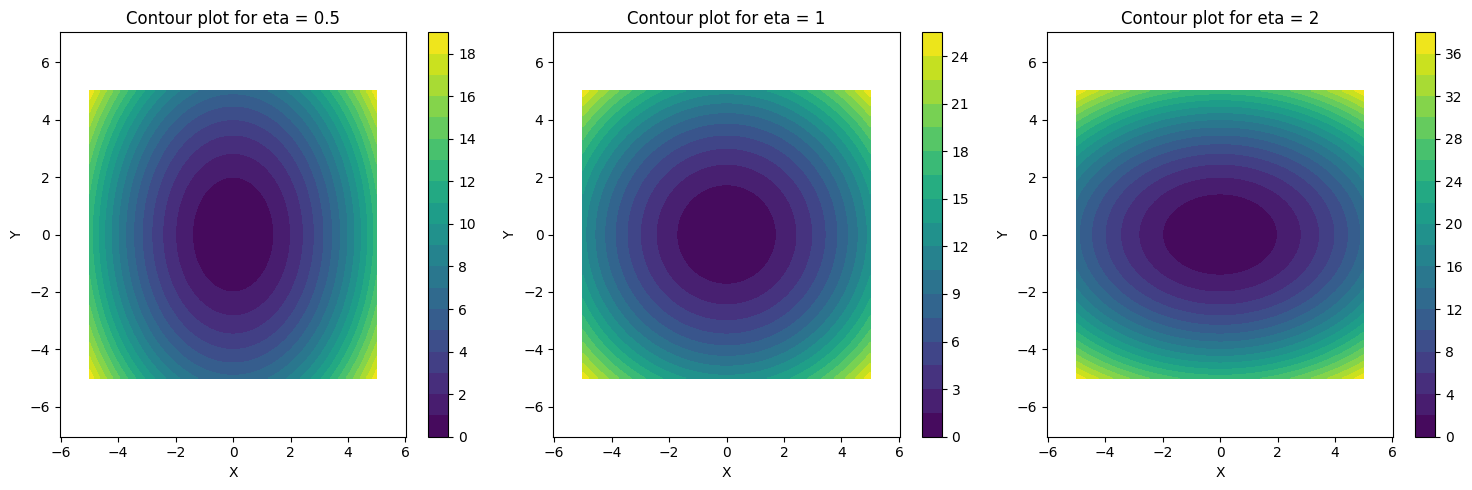

In [3]:
# Define parameters for the grid and function
xmin, xmax, Nx = -5, 5, 100
ymin, ymax, Ny = -5, 5, 100
eta_values = [0.5, 1, 2]  # Different values of eta to analyze
Ncontour = 20  # Number of contour levels

# Create a grid
x = np.linspace(xmin, xmax, Nx)
y = np.linspace(ymin, ymax, Ny)
XX, YY = np.meshgrid(x, y)

# Plot contour plots for different values of eta
plt.figure(figsize=(15, 5))
for i, eta in enumerate(eta_values, 1):
    F = (XX**2 + eta * YY**2) / 2
    plt.subplot(1, len(eta_values), i)
    contour = plt.contourf(XX, YY, F, Ncontour, cmap="viridis")
    plt.colorbar(contour)
    plt.title(f"Contour plot for eta = {eta}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis("equal")

plt.tight_layout()
plt.show()


Comments:

The contour lines represent different levels of the function FF, and the shape of the contours varies based on eta. For smaller eta, the contours are more stretched along the x-axis, while for larger η, they are more stretched along the y-axis.


In [5]:
import sympy as sp

# Define the symbols
x1, x2, eta = sp.symbols("x1 x2 eta")

# Define the function f
f = (x1**2 + eta * x2**2) / 2

# Compute the gradient of f
gradient_f = [sp.diff(f, var) for var in (x1, x2)]

# Compute the Hessian matrix of f
hessian_f = sp.hessian(f, (x1, x2))

# Evaluate for specific eta (e.g., eta = 1)
eta_value = 1
# Substitute eta = 1 into the Hessian matrix
hessian_f_eta1 = hessian_f.subs(eta, eta_value)

# Compute the eigenvalues of the Hessian matrix with eta = 1
eigenvalues_eta1 = hessian_f_eta1.eigenvals()

# Extract the maximum eigenvalue (spectral norm)
spectral_norm_eta1 = max(eigenvalues_eta1.keys())

# Compute maximum tau_k for convergence
max_tau_k_eta1 = 2 / spectral_norm_eta1

(
    gradient_f,
    hessian_f,
    hessian_f_eta1,
    eigenvalues_eta1,
    spectral_norm_eta1,
    max_tau_k_eta1,
)

([x1, eta*x2],
 Matrix([
 [1,   0],
 [0, eta]]),
 Matrix([
 [1, 0],
 [0, 1]]),
 {1: 2},
 1,
 2)

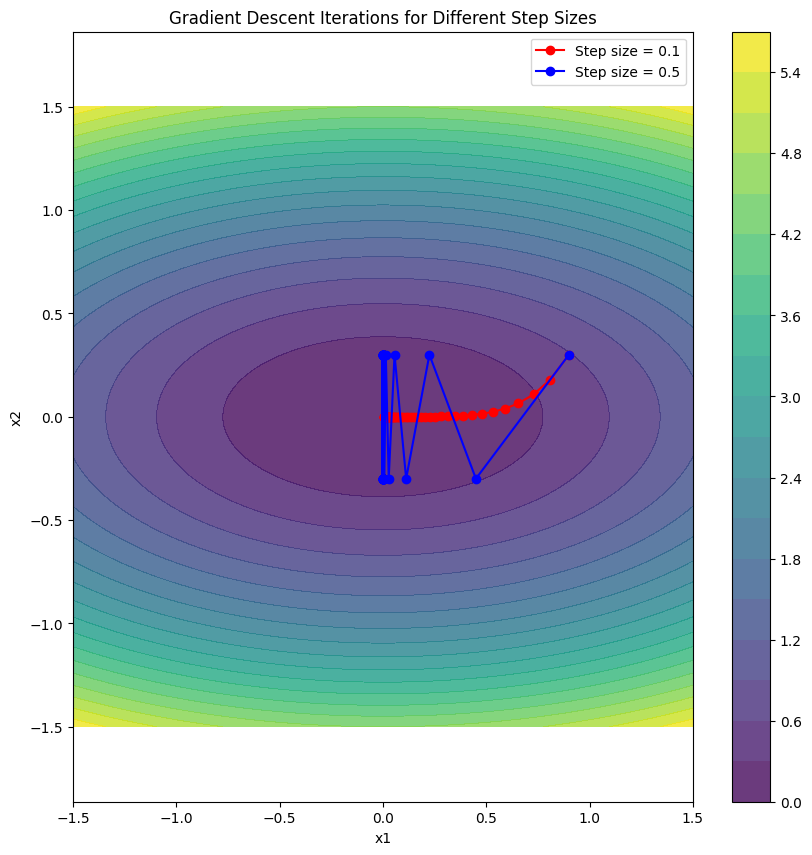

In [15]:
# Parameters for gradient descent
eta_value = 4  # Given eta
x0 = np.array([0.9, 0.3])  # Initial point
step_sizes = [0.1, 0.5]  # Different step sizes to test
max_iters = 50  # Maximum number of iterations
tol = 1e-6  # Tolerance for stopping criteria


# Define the function and its gradient
def f(x, eta):
    return (x[0] ** 2 + eta * x[1] ** 2) / 2


def grad_f(x, eta):
    return np.array([x[0], eta * x[1]])


# Gradient Descent Method
def gradient_descent(x0, eta, step_size, max_iters, tol):
    x_vals = [x0]
    x = x0.copy()
    for _ in range(max_iters):
        grad = grad_f(x, eta)
        x_new = x - step_size * grad
        x_vals.append(x_new)
        if np.linalg.norm(x_new - x) < tol:  # Convergence check
            break
        x = x_new
    return np.array(x_vals)


# Generate contour plot for eta = 4
xmin, xmax, Nx = -1.5, 1.5, 100
ymin, ymax, Ny = -1.5, 1.5, 100
x = np.linspace(xmin, xmax, Nx)
y = np.linspace(ymin, ymax, Ny)
XX, YY = np.meshgrid(x, y)
F = (XX**2 + eta_value * YY**2) / 2

plt.figure(figsize=(10, 10))
contour = plt.contourf(XX, YY, F, levels=20, cmap="viridis", alpha=0.8)
plt.colorbar(contour)
colors = ["red", "blue"]
for step_size, color in zip(step_sizes, colors):
    x_vals = gradient_descent(x0, eta_value, step_size, max_iters, tol)
    plt.plot(
        x_vals[:, 0], x_vals[:, 1], "-o", color=color, label=f"Step size = {step_size}"
    )
plt.title("Gradient Descent Iterations for Different Step Sizes")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.axis("equal")
plt.show()

In [ ]:
def grad_f(x):
    return np.array([x[0], eta_value * x[1]])


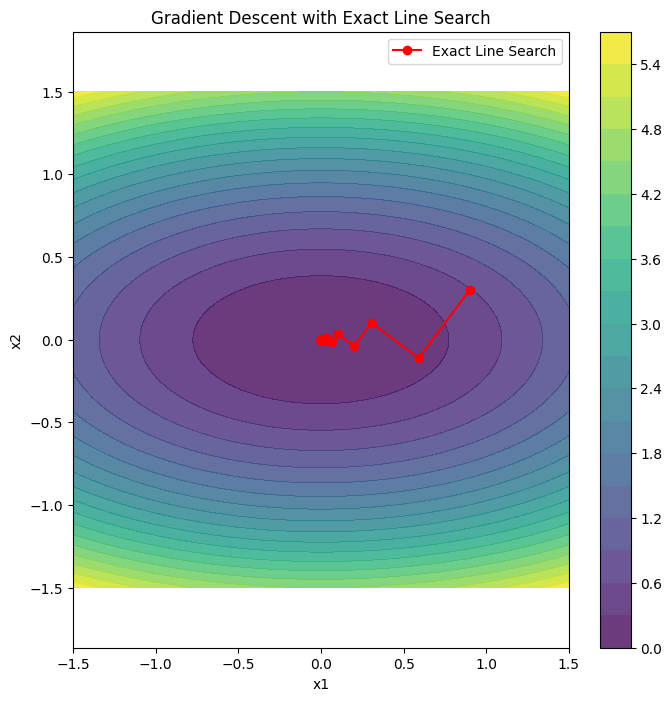

In [8]:
# Gradient Descent with Exact Line Search
def exact_line_search_gradient_descent(x0, eta, max_iters, tol):
    x_vals = [x0]
    x = x0.copy()

    for _ in range(max_iters):
        grad = grad_f(x, eta)

        # Compute the optimal step size (exact line search)
        # tau_k = argmin_tau f(x - tau * grad_f(x))
        # The optimal tau_k for this quadratic function is given by:
        tau_k = np.dot(grad, grad) / (grad[0] ** 2 + eta * grad[1] ** 2)

        # Update x
        x_new = x - tau_k * grad
        x_vals.append(x_new)

        # Check for convergence
        if np.linalg.norm(x_new - x) < tol:
            break

        x = x_new

    return np.array(x_vals)


# Perform gradient descent with exact line search
x_vals_exact = exact_line_search_gradient_descent(x0, eta_value, max_iters, tol)

# Generate contour plot for visualization
plt.figure(figsize=(8, 8))
contour = plt.contourf(XX, YY, F, levels=20, cmap="viridis", alpha=0.8)
plt.colorbar(contour)
plt.plot(
    x_vals_exact[:, 0], x_vals_exact[:, 1], "-o", color="red", label="Exact Line Search"
)
plt.title("Gradient Descent with Exact Line Search")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.axis("equal")
plt.show()


Comments:

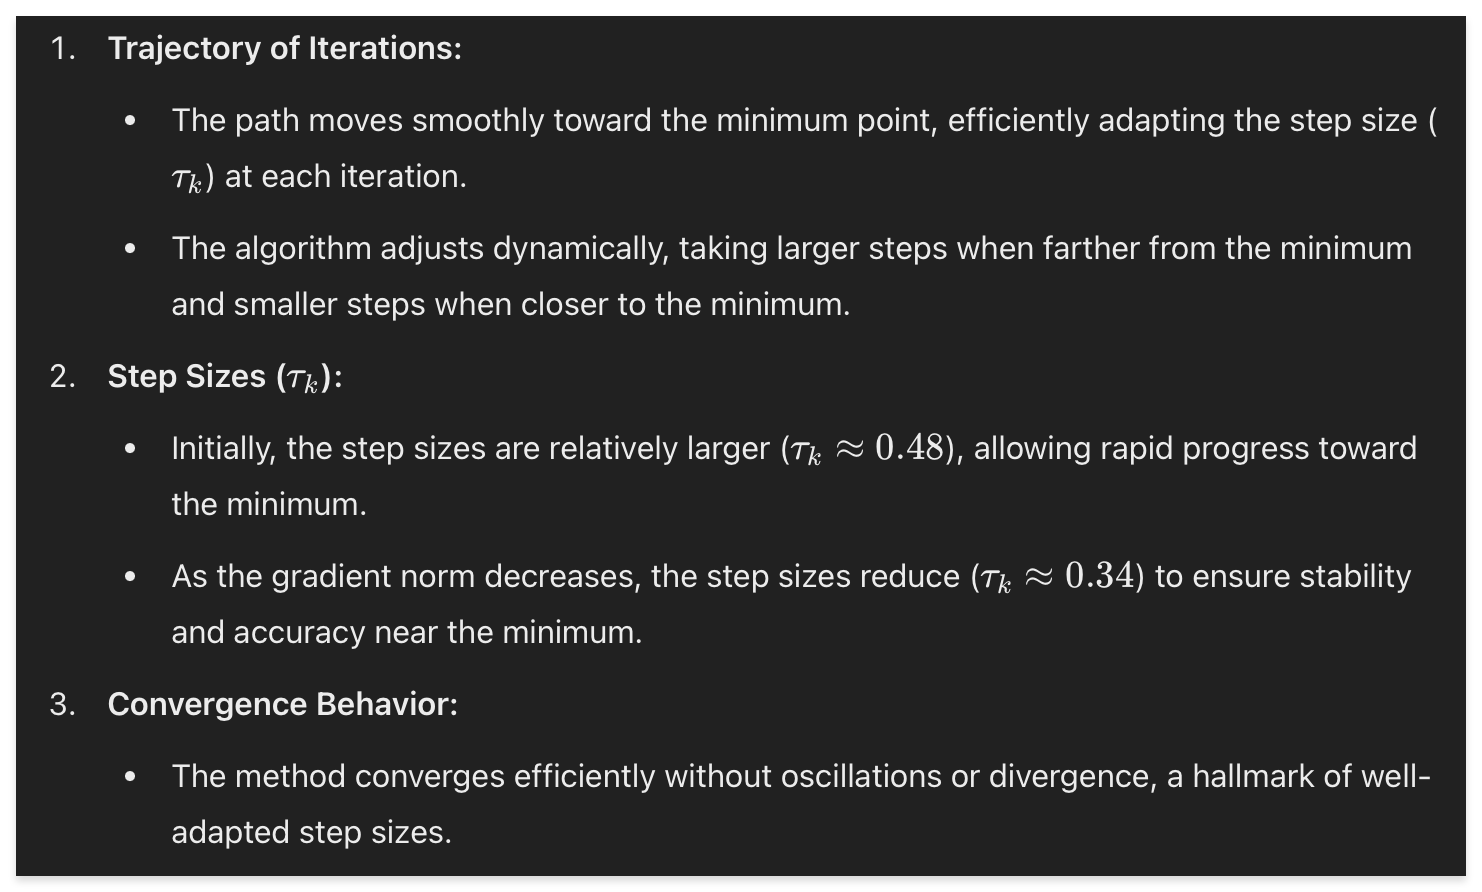